In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import fastf1 as ff1
from fastf1.core import Laps

plt.rcParams['figure.figsize'] = [12, 8]
ff1.Cache.enable_cache('cache')

race = ff1.get_session(2021, 'Monza', 'R')
race_laps = race.load_laps(with_telemetry=True)



core           INFO 	Loading laps for Italian Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['47', '5', '22', '9', '31', '77', '16', '14', '11', '88', '4', '63', '10', '99', '44', '3', '33', '18', '6', '55']


In [36]:
top_10 = Laps(race_laps).sort_values(by='SpeedST', ascending=False).reset_index(drop=True).head(10)
top_10['Driver Lap'] = top_10['Driver'].astype(str) + " LAP " + top_10['LapNumber'].astype(str)

team_colors = list()
for index, lap in top_10.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

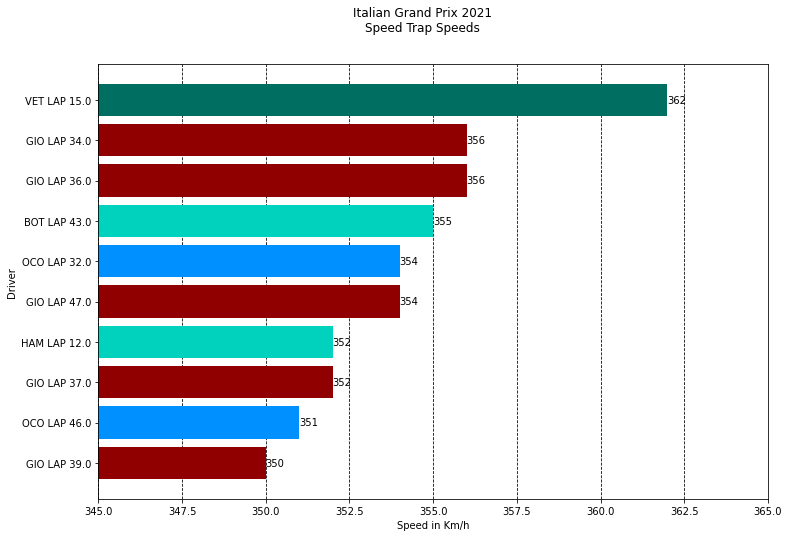

In [38]:
fig, ax = plt.subplots()
hbars = ax.barh(top_10['Driver Lap'], top_10['SpeedST'], color=team_colors)
ax.invert_yaxis()
ax.set_xlim([345, 365])
ax.set_xlabel('Speed in Km/h')
ax.set_ylabel('Driver')
ax.bar_label(hbars)
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

plt.suptitle(f"{race.weekend.name} {race.weekend.year}\n"
             f"Speed Trap Speeds")
plt.show()
